## Student Performance Exploratory Data Analysis

### Introduction
The purpose of undertaking this task is to understand and explore the student performance data and to select features that are fit to perform machine learning tasks.  I will be performing data processing and cleaning techniques if necessary to resolve potential bottlenecks and limitations of the raw data before performing data visualisations to presenting a narrative of the data.  I may have to potentially feature engineer if I deemed fit.

### Dataset
The data is downloaded from UCI’s machine learning repository.  It’s a multivariate dataset consisting of 649 instances and 33 attributes.  The raw data is based on student achievement in secondary school education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). The datasets were used to model binary / five level classification and regression tasks. The target attributed is G3 which is the final grade. 

### Method
In this notebook, I will be performing the EDA by following this approach:
- Understanding the problem: Look at each variable and importance to the problem
- Univariate analysis: Focus on dependant variable (G3 – Final grade) and learn more about it
- Multi-variate analysis: try to understand how to dependant and independent variables relate to each other.
- Data Cleaning: clean and handle any missing values and duplicates
- Test assumptions: test to check if our data conforms to assumptions by multivariate techniques. 
 
### Outline of the EDA
The code in this report will perform the following:
- Retrieve the data
- Preview the data
- Clean and process
- univariate analysis 
- multi-variate analysis
- Plot numerical distribution and categorical data
- Conclusions

### Install Dependencies 

In [534]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import csv
from scipy.stats import norm
import scipy.stats as stats

### Read the dataset

In [600]:
path = "/Users/mogutale/Downloads/student"
files = os.listdir(path)
#csv files 
data = [] # append the content of the csv file
column_names = [] # append the column names
for file in files:
    if "csv" in file:
        with open(path+"/"+file, "r") as f:
            csv_reader = csv.reader(f, delimiter = ";")
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    column_names.append(row)
                    line_count += 1
                else:
                    data.append(row)
                    line_count += 1
# read in the data into pandas dataframe 
df = pd.DataFrame(data, columns = column_names[0])

In [601]:
# add column to identify the subjects 
df["subject"] = ["por" if i <= 548 else "mat" for i in df.index]

In [602]:
# Descriptions of the 33 data attributes 
with open("/Users/mogutale/Downloads/student/student.txt", "r") as f:
    print(f.read())

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

### Preview the dataset 

In [603]:
f"Student Performance dataset: No. of rows {df.shape[0]} and No.of columns {df.shape[1]}"

'Student Performance dataset: No. of rows 1044 and No.of columns 34'

In [609]:
# preview 10 random samples of the dataset 
df.sample(10)

,school,sex,age,residential_type,famsize,parent_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,extra_ed_support,fam_ed_support,extra_paid_classes,extra-curricular activities,nursery,persue_higher,internet,romantic,family_relations,freetime,going_out,Dalc,Walc,health,absences,G1,G2,G3,subject
924,GP,F,17,U,LE3,T,2,2,services,other,course,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,yes,4,4,4,2,3,5,6,12,12,12,mat
117,GP,M,16,U,GT3,T,3,3,other,services,home,father,2,1,0,no,no,no,yes,yes,yes,yes,no,5,4,2,1,1,5,6,14,14,15,por
639,MS,M,19,R,GT3,T,1,1,other,services,other,mother,2,1,1,no,no,no,no,yes,yes,no,no,4,3,2,1,3,5,0,5,8,0,mat
869,GP,F,17,R,GT3,T,2,1,at_home,services,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,4,2,5,1,2,5,2,6,6,6,mat
468,MS,M,15,U,GT3,T,2,2,health,other,reputation,mother,3,1,0,no,no,no,no,yes,yes,no,no,4,3,3,1,2,4,1,13,12,13,por
143,GP,F,18,U,GT3,A,3,2,other,services,course,other,1,3,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,5,1,5,10,12,11,11,por
362,GP,F,18,U,GT3,T,4,4,teacher,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,4,4,3,3,5,0,12,11,13,por
573,MS,F,17,U,GT3,T,1,1,other,at_home,course,mother,1,1,0,no,yes,no,yes,yes,yes,no,no,4,3,2,1,2,5,9,7,9,10,mat
230,GP,F,17,U,GT3,T,4,3,other,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,yes,3,4,5,2,4,1,16,11,9,10,por
209,GP,F,17,U,LE3,T,2,4,services,services,course,father,1,2,0,no,no,no,yes,yes,yes,yes,yes,4,3,2,1,1,5,8,14,15,16,por


In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   object
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   object
 7   Fedu        1044 non-null   object
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   object
 13  studytime   1044 non-null   object
 14  failures    1044 non-null   object
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

#### Initial observation 
The data types are all set to string and need to be changed to the correct format, columns names are hard to understand based on the data description file so will need to change to more meaninful names and finally we may need to consider whether we need to change the category data types to dummy or one hot coding to perform stats. 

### Initial Clean up & process

In [610]:
# change the column names to meaningful names 
col_to_replace = {"address": "residential_type", "Pstatus":"parent_status", "Medu": "mother_education", "Fedu":"father_education",
                 "Mjob":"mother_job", "Fjob":"father_job", "schoolsup": "extra_ed_support","famsup":"fam_ed_support",
                 "paid":"extra_paid_classes", "activities":"extra-curricular activities", "higher":"persue_higher", 
                 "famrel":"family_relations", "goout":"going_out", "dalc":"weekday_alc_consumption", "walc":"wekend_alc_consumption"}

df.rename(col_to_replace, axis = 1, inplace = True)

In [611]:
#Change all the numerical observations to integer
for column in df.columns:
    try:
        df[column] = df[column].astype('int')
    except:
        df[column] = df[column]  

In [612]:
#inspect the first 10 rows 
pd.set_option("display.max_columns", None)
df.head()

,school,sex,age,residential_type,famsize,parent_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,extra_ed_support,fam_ed_support,extra_paid_classes,extra-curricular activities,nursery,persue_higher,internet,romantic,family_relations,freetime,going_out,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,por
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,por
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,por
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,por
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,por


In [613]:
#check stats 
df.describe()

,age,mother_education,father_education,traveltime,studytime,failures,family_relations,freetime,going_out,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


interesting observation that the student result variables shows min value of 0 unless that that refers to failure. keen to explore that more in our next section.  

### Univariate Analysis 
I will first analyse the target/dependant variable and plot its distributions 

In [614]:
#descriptive statistics summary
df['G3'].describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64

'ok the minimum is 0 which is a bit problematic. How do you achieve zero on an exam result? lets look further into this and plot the distribution of the data' 

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


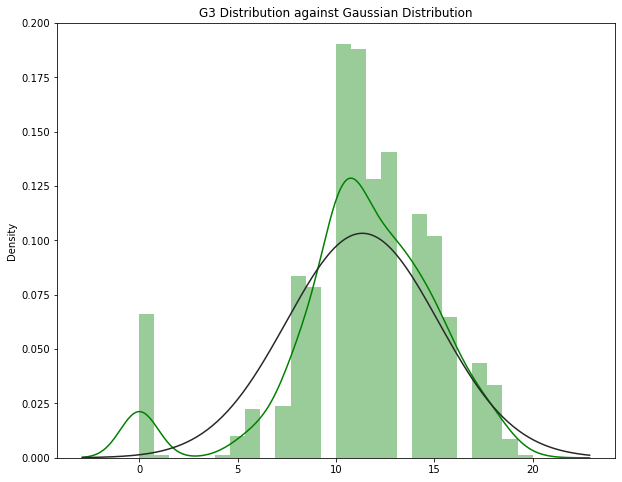

In [615]:
# lets plot the distribution of G3
plt.figure(figsize = (10,8))
sns.distplot(x = df["G3"], fit=norm, kde=True, hist = True, color = "green")
plt.title("G3 Distribution against Gaussian Distribution")
plt.show()

In [585]:
print("Skew of the final grade result is:{:.2f}".format(df["G3"].skew()))

Skew of the final grade result is:-0.99


In [616]:
print("Kurtosis of the final grade result is:{:.2f}".format(df["G3"].kurtosis()))

Kurtosis of the final grade result is:1.74


'We can see that we have some outliers and the data doesnt quite fit into normal distribution, we now need to understand what percentage of these are sitting on zero. We can also observe the peakedness of the distribution and right skewness of the data'

In [617]:
# lets look at outliers 
df_mean = df["G3"].mean()
df_std =  df["G3"].std()

outliers = [i for i in df["G3"] if i > (df_mean + (df_std * 2.5)) or i < (df_mean - (df_std * 2.5))]
f"The No. of outliers: {len(outliers)} and percentage over the entire dataset is {np.round(len(outliers) / df.shape[0],2)}"

'The No. of outliers: 54 and percentage over the entire dataset is 0.05'

In [618]:
# ok, we have roughly 5% of the dataset is an outlier in our definition.  lets inspect these.  
outlier_df = df[df["G3"].isin(outliers)]
outlier_df.head()

,school,sex,age,residential_type,famsize,parent_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,extra_ed_support,fam_ed_support,extra_paid_classes,extra-curricular activities,nursery,persue_higher,internet,romantic,family_relations,freetime,going_out,Dalc,Walc,health,absences,G1,G2,G3,subject
163,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,2,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,11,9,0,por
172,GP,M,16,U,GT3,T,3,3,other,services,course,father,1,2,1,no,yes,no,no,yes,yes,yes,yes,4,5,5,4,4,5,0,10,10,1,por
440,MS,M,16,U,GT3,T,1,1,at_home,services,home,mother,2,2,0,no,yes,no,yes,yes,yes,no,yes,5,4,5,4,5,3,0,7,0,0,por
519,MS,M,16,R,GT3,T,2,1,other,services,reputation,mother,2,2,0,no,no,no,yes,yes,yes,yes,no,5,2,1,1,1,2,0,8,7,0,por
563,MS,M,17,U,GT3,T,2,2,other,other,course,mother,1,1,1,no,no,no,yes,yes,yes,no,yes,1,2,1,2,3,5,0,7,0,0,mat


In [619]:
# ok lets look at those whom have received zero at G1 against those at G3 and also those at G2 against G3. 
df[(df.G1 == 0) & (df.G3 == 0)]
df[(df.G2 == 0) & (df.G3 == 0)] # it seems to be that those who failed at G2 exam Math also failed G3 exam math. 

# we will now calculate the % of those who failed in G3 exam who also failed in G2 exam.  
print("% of those student who failed in G2 and G3 exams is:{:.2f}".format(len(outlier_df[outlier_df.G2 == 0]) / len(outlier_df[outlier_df.G3 == 0])))

% of those student who failed in G2 and G3 exams is:0.38


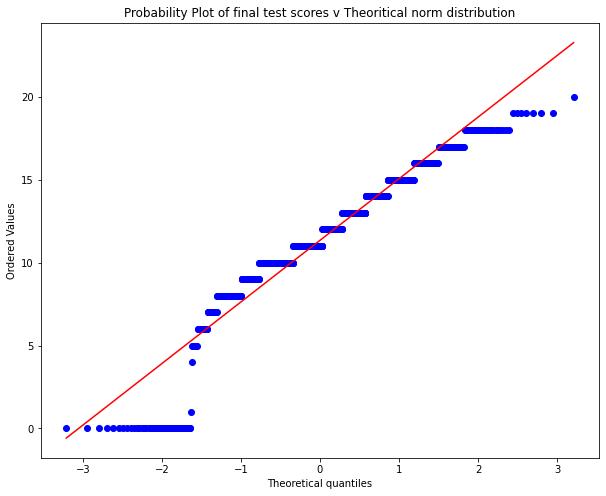

In [620]:
# lets look at qq plot which repeats the same as above
plt.figure(figsize = (10,8))
stats.probplot(df['G3'], dist="norm", plot=plt)
plt.title("Probability Plot of final test scores v Theoritical norm distribution")
plt.show()

This confirm what we have statistically showed earlier that the distribution is right skewed with long left tail with outliers equating to 5% at the left tail. we know that a lot of machine learning algorithms rely on data conforming to normality so lets see what happens when the outliers are removed.  

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


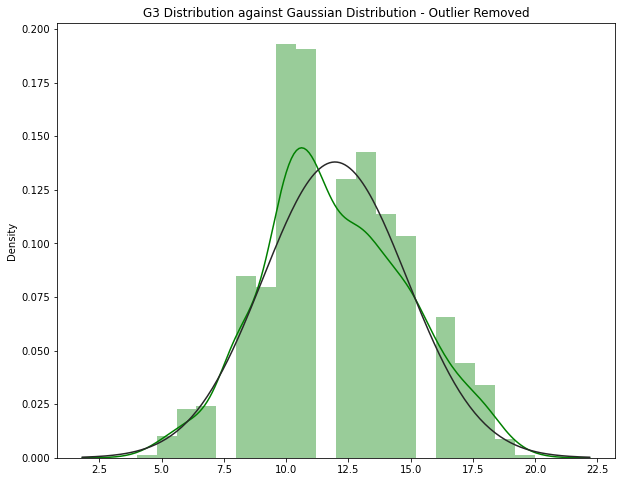

In [621]:
df2 = df[~df.isin(outlier_df)]

plt.figure(figsize = (10,8))
sns.distplot(x =df2["G3"], fit=norm, kde=True, hist = True, color = "green")
plt.title("G3 Distribution against Gaussian Distribution - Outlier Removed")
plt.show()

### Multi Variate Analysis 
Relationship with other variables 

#### Relationship with Numerical Variables

<Figure size 720x576 with 0 Axes>

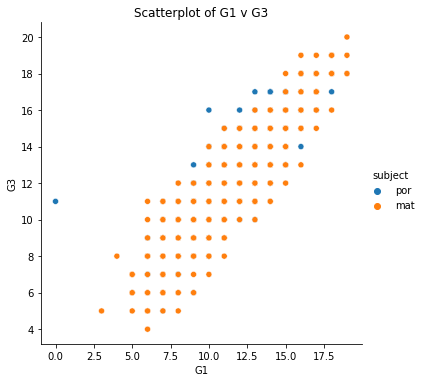

In [639]:
#scatter plot G1/G3
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'G1', y = 'G3', data = df2, hue = 'subject')
plt.title("Scatterplot of G1 v G3")
plt.show()

'we have decent linear relation between G1 & G3 particular with math subject and not great for portagese. lets inventigate that outlier value'

In [637]:
df3 = df2[~(df2['G1'] < 2)]

<Figure size 720x576 with 0 Axes>

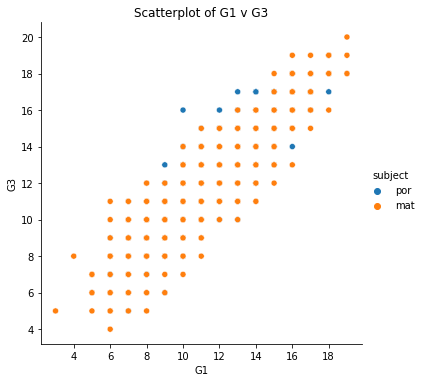

In [640]:
# lets try again and plot the scatter
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'G1', y = 'G3', data = df3, hue = 'subject')
plt.title("Scatterplot of G1 v G3")
plt.show()

'ok now thats better' 

<Figure size 720x576 with 0 Axes>

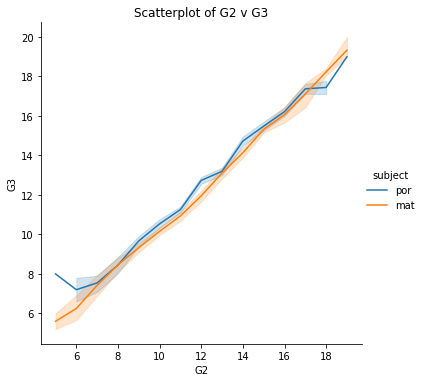

In [653]:
#line plot G2/G3
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'G2', y = 'G3', data = df2, hue = 'subject', kind = 'line')
plt.title("Scatterplot of G2 v G3")
plt.show()

'This is now much better and strong linear relationship'

<Figure size 720x576 with 0 Axes>

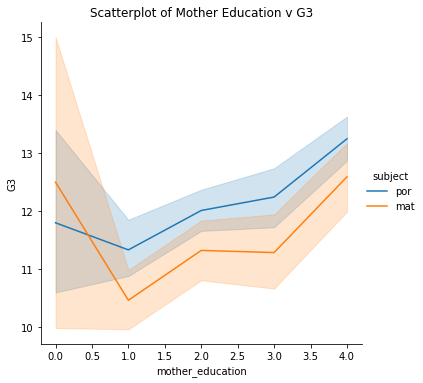

In [654]:
#line plot Mothers Education/G3
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'mother_education', y = 'G3', data = df2, hue = 'subject', kind = 'line')
plt.title("Scatterplot of Mother Education v G3")
plt.show()

'ok this tells us that the higher the mothers education the higher the acievement of the students. however weak relationship'. lets see what happens when we also plot the fathers education level. 

<Figure size 720x576 with 0 Axes>

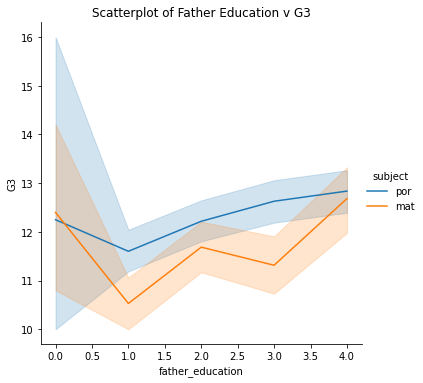

In [656]:
#line plot Fathers Education/G3
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'father_education', y = 'G3', data = df2, hue = 'subject', kind = 'line')
plt.title("Scatterplot of Father Education v G3")
plt.show()

' not much hope, this even weaker but still tells us the higher the fathers education level, the higher the education achievement similar to mother but not as strong. Can we create a new feature engineer that gives us a better relations. we will call this parents education'

In [657]:
df2['parent_education'] = df2['mother_education'] * df2['father_education']

<Figure size 720x576 with 0 Axes>

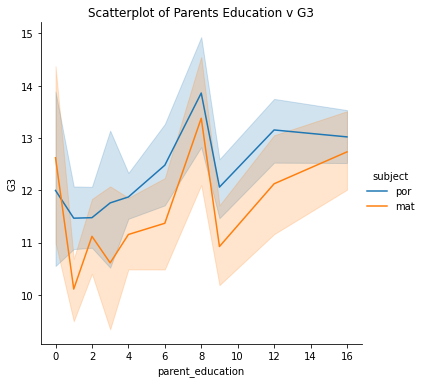

In [660]:
#line plot Parent education/G3
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'parent_education', y = 'G3', data = df2, hue = 'subject', kind = 'line')
plt.title("Scatterplot of Parents Education v G3")
plt.show()

'slighly better but still weak'

<Figure size 720x576 with 0 Axes>

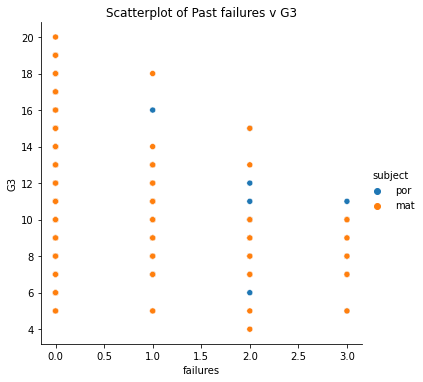

In [661]:
#scatter plot past failures/G3
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'failures', y = 'G3', data = df2, hue = 'subject')
plt.title("Scatterplot of Past failures v G3")
plt.show()

'this shows a weak negative relationship and lets see if we can take polynomial of the failure column and improve'

<Figure size 720x576 with 0 Axes>

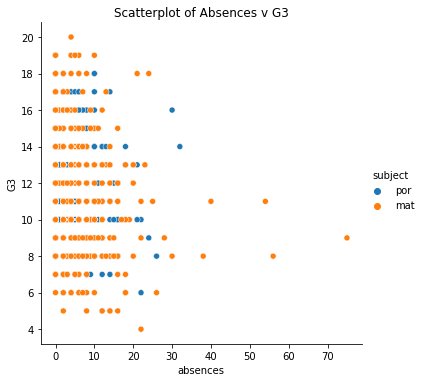

In [739]:
#scatter plot past absences/G3
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'absences', y = 'G3', data = df2, hue = 'subject')
plt.title("Scatterplot of Absences v G3")
plt.show()

'we can some extreme values that we can deal with, lets see when we remove these what happens'

In [708]:
std = df2['absences'].std()
mean = df2['absences'].mean()
outliers = [i for i in df2["absences"] if i > (mean + (std * 2.5)) or i < (mean - (std * 2.5))]
f"The No. of outliers: {len(outliers)} and percentage over the entire dataset is {np.round(len(outliers) / df2.shape[0],2)}"

'The No. of outliers: 23 and percentage over the entire dataset is 0.02'

<Figure size 720x576 with 0 Axes>

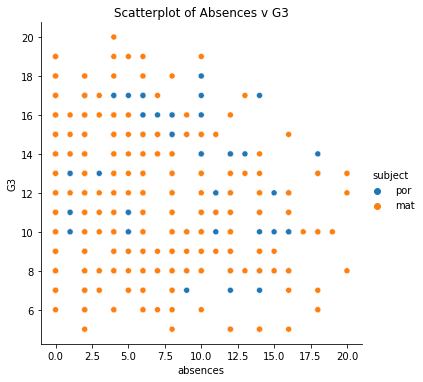

In [714]:
df3 = df2[~df2['absences'].isin(outliers)]

#lets replot again
plt.figure(figsize = (10,8))
ax = sns.relplot(x = 'absences', y = 'G3', data = df3, hue = 'subject')
plt.title("Scatterplot of Absences v G3")
plt.show()

'still weak relation but you can still read that the lower the absence the higher the achievement'

#### Relationship with Categorical Variables

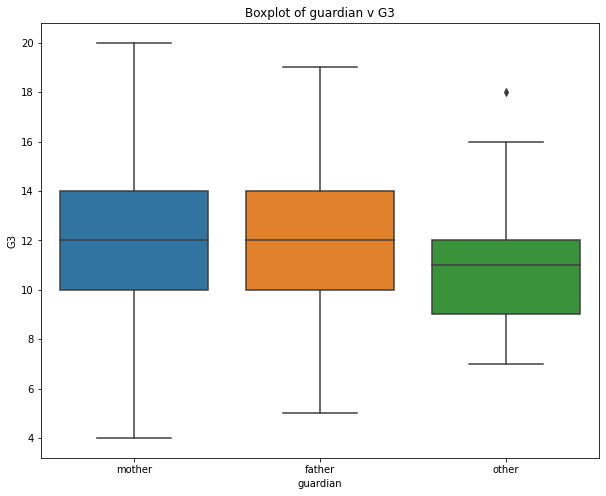

In [662]:
#box plot guardian/G3
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'guardian', y = 'G3', data = df2)
plt.title("Boxplot of guardian v G3")
plt.show()

'ok the median drops when the student's guardian is other but roughly the same for biological parents however longer tail end for mother with higher acheivement.  we however have one extreme value in other'

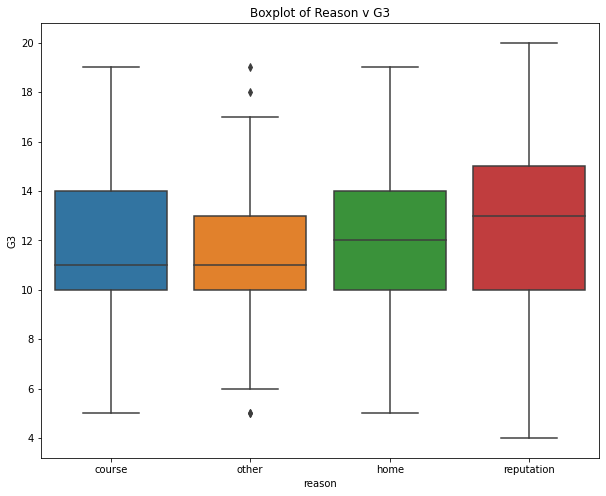

In [701]:
#box plot Reason / G3
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'reason', y = 'G3', data = df2)
plt.title("Boxplot of Reason v G3")
plt.show()

'it seems that if the parents have chosen the school for repulation purposes then the student is likely ti achieve higher results'

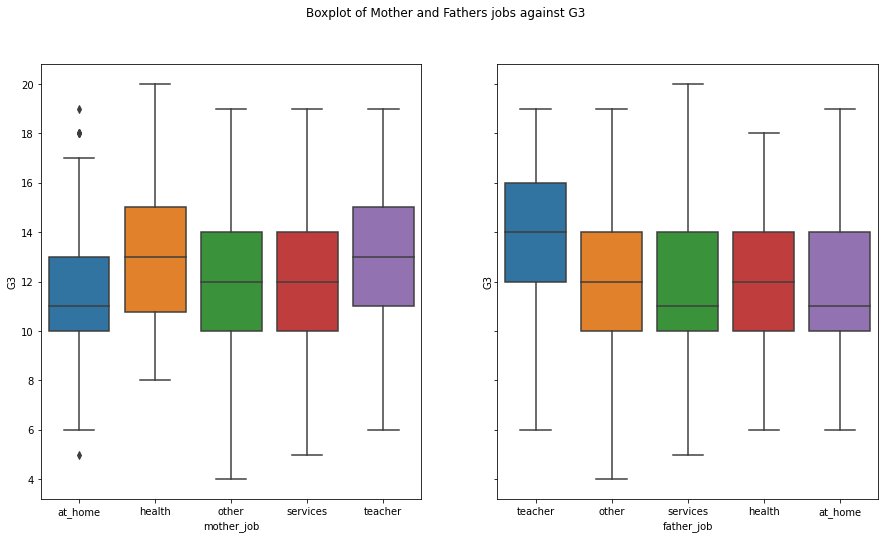

In [700]:
#box plot Mother Job and Father /G3
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Boxplot of Mother and Fathers jobs against G3')
sns.boxplot(ax = axes[0], x = 'mother_job', y = 'G3', data = df2)
sns.boxplot(ax = axes[1], x = 'father_job', y = 'G3', data = df2)
plt.show()

'ok, it seems that if the students parents are teachers then they are most likely to perform higher as supposed to stay at home'

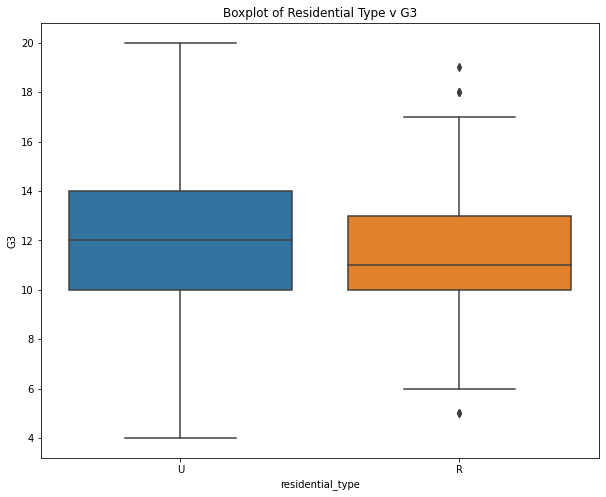

In [715]:
#box plot Residential Type / G3
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'residential_type', y = 'G3', data = df2)
plt.title("Boxplot of Residential Type v G3")
plt.show()

#### In Summary

we can conclude that if the student has consistantly achieved higher scores in the previous test  and has less absence and parents are educated and living in urban location they are far more likely to achieve higher scores than otherwise. 

In [735]:
# Now can can calculate the corrlations
correl = np.around(df2.corr(),2)

In [736]:
correl["G3"] # look at correlation between target and other 

age                -0.08
mother_education    0.23
father_education    0.17
traveltime         -0.11
studytime           0.19
failures           -0.35
family_relations    0.06
freetime           -0.08
going_out          -0.13
Dalc               -0.17
Walc               -0.18
health             -0.09
absences           -0.22
G1                  0.88
G2                  0.95
G3                  1.00
parent_education    0.22
failure_poly       -0.29
Name: G3, dtype: float64

This shows us that there is a weak correlation between independant variable and G3 with the exception of G1 & 2.  

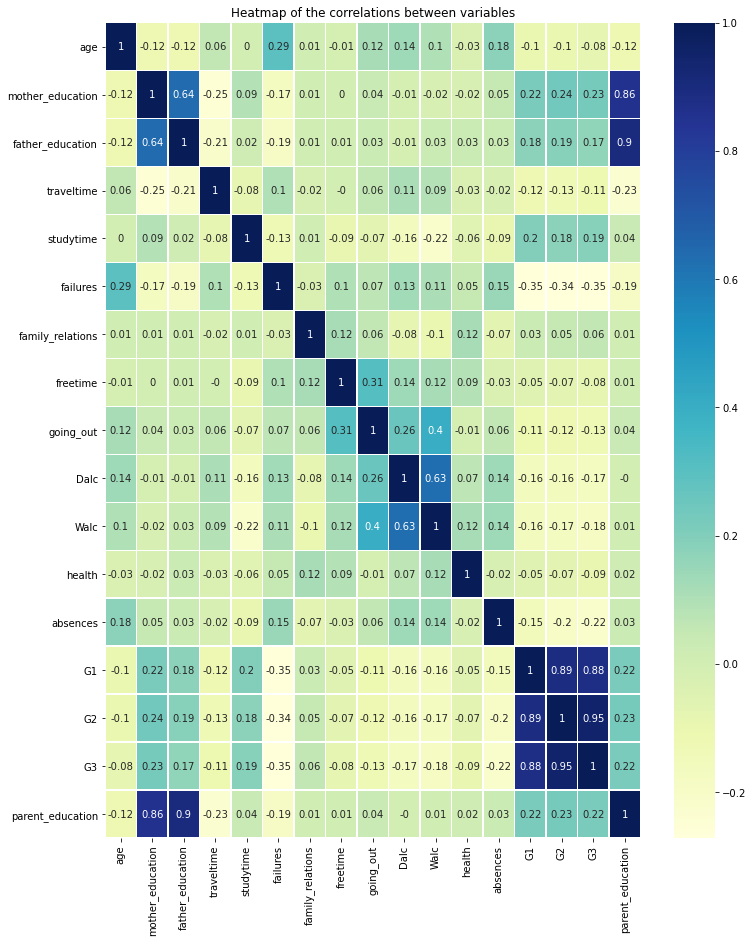

In [719]:
# lets plot the correlations matrix 
plt.figure(figsize = (12,15))
sns.heatmap(correl, cmap="YlGnBu", linewidths=.5, robust= True, annot = True)
plt.title("Heatmap of the correlations between variables")
plt.show()

### Conclusions 

Overall there are few strong to moderate variables to the target variable G3 (final student performance). 

The following independant variables are good predictor of the target variable;
- G1 & G2 - have strong correlation with G3 and thus good predictors 
- mothers education variable has a weak to moderate correlation with G3 
- studytime also shows a weak to moderate correlation. 

all in all, as concluded earlier there are some indicators that suggest potential reason for a student to underform and overperform.  These include the parents education level, past student failures, residential type, parents current job, number of absences and study hours. Although these contribute a small factor in overal student performance.

after all, the dataset is not large enough to properly analyse the affect of these variables.  

### References 

- Machine learning repository - student performance data https://archive.ics.uci.edu/ml/datasets/Student+Performance 